# Linear Regression in linear and log scale

Linear regression is typically used in statistics for obtaining a line that best fit through a data set between two (or more) features (variable). Then, using that line predictions of one of the features can be made by knowning the other.

In this tutorial we will explore how to compute a linear fit and use it for predictions. We will use petrophysical data (permeability and porosity) where one of the variables vary linearly in a logarithmic scale. So, we will be computing a semi-log linear regression. 

We will be using porosity and permeability data from a core. First, we will use a standard python library named scikit learn, tipically used for machine learning, to compute the linear regression, and second, we will compute the linear regression from scratch using numpy library. We will be using also the libraries pandas and seaborn, both preatty handy managing spreedshets and plotting them.  

During the tutorial you will be filling the missing parts of the code where the '--' are.  

# Using Python libraries (scikit learn) 

(1) Import the python libraries

In [1]:
import pandas as pd # for managing spreedshet 
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import numpy as np # for dealing with vectors and arrays (linear algebra)
from sklearn.linear_model import LinearRegression # for dealing with more complex math (as regressions) 

(2) Import the database as pandas dataframe: Core data from a well in the Norwegian North Sea (public Evolve dataset). 
We will be importing the columns for the depth (DEPTH), core porosity (CPOR), core permeability (CKHL), and core grain density (CGD). 

In [2]:
# to do: write the file name and the columns names
df = pd.read_csv("Data/15_9-19A-CORE.csv", na_values=' ', usecols=['DEPTH', 'CPOR', 'CKHL', 'CGD'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   728 non-null    float64
 1   CKHL    557 non-null    float64
 2   CPOR    593 non-null    float64
 3   CGD     594 non-null    float64
dtypes: float64(4)
memory usage: 22.9 KB


Notice that that the properties are not evenly space, so we will be dropping rows with any missing values. 

In [4]:
#Drop nans
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 0 to 727
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   557 non-null    float64
 1   CKHL    557 non-null    float64
 2   CPOR    557 non-null    float64
 3   CGD     557 non-null    float64
dtypes: float64(4)
memory usage: 21.8 KB


For a quick look of the imported data, seaborn scatterplot can be used. 
Plot the porosity on the x axis, permeability in the y axis and grain density as the 'hue' (color of each plotted point). 

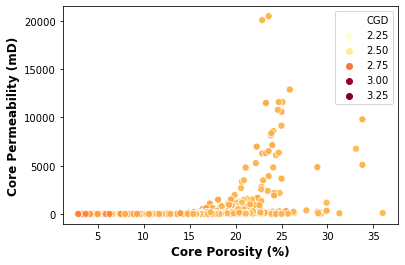

In [5]:
p = sns.scatterplot(x=df['CPOR'], y=df['CKHL'], hue=df['CGD'], palette='YlOrRd', s=50)
p.set_ylabel('Core Permeability (mD)', fontsize=12, fontweight='bold')
p.set_xlabel('Core Porosity (%)', fontsize=12, fontweight='bold');

Now, plot the same but setting the scale of the y axis to log (permeability) using p.set(yscale='log').

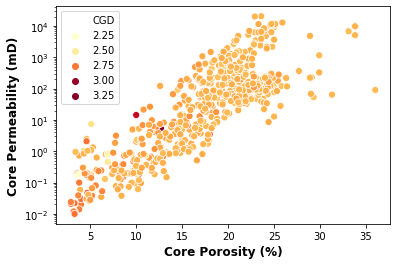

In [6]:
p = sns.scatterplot(x=df['CPOR'], y=df['CKHL'], hue=df['CGD'], palette='YlOrRd', s=50)
p.set_ylabel('Core Permeability (mD)', fontsize=12, fontweight='bold')
p.set_xlabel('Core Porosity (%)', fontsize=12, fontweight='bold')
p.set(yscale='log');

For computing the linear regression using scikit learn libreary, first its useful to extract the axis values from the dataframe to be used as starndars arrays in the linear regression. 

In [7]:
x = df['CPOR'].values
y = np.log10(df['CKHL'].values)
x.shape

(557,)

For the linear regression (using scikit) we need to reshape the shape of these arrays. 

In [8]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x.shape

(557, 1)

Next, we need to create our scikit model for linear regression
(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [9]:
model = LinearRegression() # object called linear regression 

Now we will call a method (function) of the linear regression object to fit the data. This method will fit the data and save the inversion parameters in the object as attributes (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit)

In [10]:
model.fit(x, y)

LinearRegression()

Let's  look out the performance under R square value metric (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)

In [11]:
r2 = model.score(x, y)
r2

0.7104407167237579

Let's look at the inverted parameters: the intercept point and the slope coefficient

In [12]:
model.intercept_

array([-1.79142803])

In [13]:
model.coef_

array([[0.18299988]])

This is how the linear curve looks

In [14]:
regression_eq = f'10**({model.coef_[0][0]:.4f} * CPOR + ({model.intercept_[0]:.4f}))'
print(regression_eq)

10**(0.1830 * CPOR + (-1.7914))


Now lets plot the line on top of the scatter plot from above. 

In [ ]:
x_plot_vals = np.arange(1, 37) # create an x axis array (porosities)
y_pred = model.predict(x_plot_vals.reshape(-1,1)) # predict they y values using the equation (permeabilities; log space)

y_pred_log = 10**y_pred # take to linear space 

In [25]:
results_df = pd.DataFrame({'por_vals': x_plot_vals, 'perm_vals': y_pred_log.flatten()}) # convert to df to plot on sns
results_df

,por_vals,perm_vals
0,1,0.024636
1,2,0.037547
2,3,0.057223
3,4,0.087211
4,5,0.132914
5,6,0.202568
6,7,0.308725
7,8,0.470512
8,9,0.717085
9,10,1.092876


Finally let's plot the line along with the data

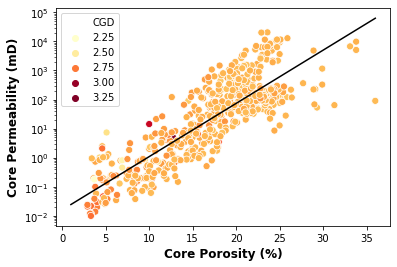

In [26]:
p = sns.scatterplot(x=df['CPOR'], y=df['CKHL'], hue=df['CGD'], palette='YlOrRd', s=50)
p = sns.lineplot(x=results_df['por_vals'], y=results_df['perm_vals'], color='black')
p.set(yscale='log')
p.set_ylabel('Core Permeability (mD)', fontsize=12, fontweight='bold')
p.set_xlabel('Core Porosity (%)', fontsize=12, fontweight='bold');

# Coding the linear regression

The straight line problem  the model is $$d_i = m_1 + m_2 * d_i$$ 
As we have several of points (i of N), we could write this as a matrix form $$Gm=d$$ 
This system of equation has the form of 
\[ \begin{bmatrix}
    1 & z_{1} \\
    1 & z_{2} \\
   ... & ... \\
    1 & z_{N} \\
\end{bmatrix}
\begin{bmatrix}
    m_{1} \\
    m_{2} \\
\end{bmatrix}
=
\begin{bmatrix}
    m_{1} \\
    m_{2} \\
    ...   \\
    m_{N} \\'
\end{bmatrix}
\]

The least square solution for thi system of equations, which is the values for vector 'm', can be simple computed by

$$m=[G^T G]^{-1} G^T d$$


Lets first compute G. First design the matrix and filled with zeros:

In [34]:
G=np.zeros((len(df['CPOR']),2)) 
G

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

and fill it properly

In [35]:
for i in range(len(G)):
    G[i][0]=1.
    G[i][1]=df['CPOR'].values[i]
G

array([[ 1. , 17. ],
       [ 1. , 10.8],
       [ 1. , 12.8],
       ...,
       [ 1. , 20.9],
       [ 1. , 17.3],
       [ 1. , 18.5]])

Now lets design vector 'd'

In [39]:
d=np.log10(np.asarray(df['CKHL'].values)) 
d

array([ 1.06069784,  1.33041377, -0.15864053,  2.69108149,  2.40312052,
        3.03342376,  2.61489722,  1.2121876 , -0.7235382 ,  0.72916479,
        2.7458552 , -1.03621217,  2.37657696,  2.18184359,  2.46686762,
        1.5899496 ,  2.2764618 ,  1.75587486,  1.64048144, -0.17069623,
        1.08278537,  2.1931246 ,  2.08635983,  2.07188201,  2.04921802,
        2.03342376,  1.88422877,  1.81822589,  1.78958071,  1.95664858,
        1.92220628,  2.09342169,  2.20139712,  2.07918125,  2.04139269,
        1.41497335, -0.13966199,  1.17026172,  1.1172713 ,  2.10037055,
        2.10720997,  1.99694925,  2.15228834,  2.09342169,  1.69897   ,
        1.51188336,  1.72672721,  1.67302091,  1.70070372,  1.66931688,
        1.5865873 ,  1.55266822,  1.96941591,  2.02530587,  2.05690485,
        2.32014629,  1.26007139,  0.50514998, -0.04575749, -1.69897   ,
       -1.85387196, -1.92081875,  1.25527251,  1.40654018, -0.81815641,
       -1.92081875, -2.        , -0.41566878,  1.23044892,  1.51

We need to compute $$[G^T G]^{-1} G^T$$

For computing the transpose simple add '.T' to the matrix. 

For matrices multiplication use 'np.matmult(M1,M2)'

For the inverse of a matrix use 'inv' from numpy.linalg

In [41]:
from numpy.linalg import inv

In [40]:
Gt=G.T
Gt

array([[ 1. ,  1. ,  1. , ...,  1. ,  1. ,  1. ],
       [17. , 10.8, 12.8, ..., 20.9, 17.3, 18.5]])

In [42]:
m=np.matmul(np.matmul(inv(np.matmul(Gt,G)),Gt),d)
m

array([-1.79142803,  0.18299988])

The new equation look like this

In [43]:
regression_eq = f'10**({m[1]:.4f} * CPOR + ({m[0]:.4f}))'
print(regression_eq)

10**(0.1830 * CPOR + (-1.7914))


Just as before, let's plot it along the data 

In [ ]:
x_plot_vals = np.arange(1, 37)
y_pred2 = m[1]*x_plot_vals+m[0]

y_pred_log2 = 10**y_pred2

results_df2 = pd.DataFrame({'por_vals': x_plot_vals, 'perm_vals': y_pred_log2})
results_df2

In [ ]:
p = sns.lineplot(x=results_df2['por_vals'], y=results_df2['perm_vals'], color='b')
p = sns.scatterplot(x=df['CPOR'], y=df['CKHL'], hue=df['CGD'], palette='YlOrRd', s=50)
p.set(yscale='log')
p.set_ylabel('Core Permeability (mD)', fontsize=12, fontweight='bold')
p.set_xlabel('Core Porosity (%)', fontsize=12, fontweight='bold');